<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/Predict_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>목표: 당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델 만들기</h1>

<h2>문제 해결을 위해 당뇨병 환자의 데이터 준비하기<h2>

In [ ]:
# 1. load_diabetes() 함수로 당뇨병 데이터 준비하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
type(diabetes) # diabetes 변수에 저장된 값의 자료형은 파이썬 딕셔너리(dictionary)와 유사한 Bunch 클래스이다.

sklearn.utils._bunch.Bunch

In [ ]:
# 2. 입력과 타깃 데이터의 크기 확인하기
# diabetes의 속성 중 data 속성과 target 속성에는 입력과 타깃 데이터가 넘파이 배열로 저장되어 있는데 shape 속성으로 확인할 수 있다.
print(f'Data Shape: {diabetes.data.shape}')
print(f'Target Shape: {diabetes.target.shape}')

Data Shape: (442, 10)
Target Shape: (442,)


data는 442x10 크기의 2차원 배열이고 tartget은 442개의 요소를 가진 1차원 배열임을 확인할 수 있다.<br>
이때, diabetes.data에서 행은 샘플(sample)이고, 열은 샘플의 특성(feature)이다.<br>
샘플: 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트<br>
특성: 당뇨병 데이터의 여러 특징들(ex: 환자의 혈압, 혈당, 몸무게, 키) = 독립 변수(independent variable)
<br>
즉, 특성(특징)들의 수치를 모아 1세트로 만들면 1개의 샘플이 된다.

In [ ]:
diabetes.data[:5] # diabetes.data에 저장된 입력 데이터 중 앞부분의 샘플 5개만 출력

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [ ]:
diabetes.target[:5] # diabetes.target에 저장된 데이터 중 앞부분의 샘플 5개만 출력
# 타깃 데이터는 10개의 요소로 구성된 샘플 1개에 대응됨

array([151.,  75., 141., 206., 135.])

이 예제를 풀기 위해 data의 입력 데이터와와 target 데이터의 수치를 해석하는 것은 전문가인 의사의 영역이므로 이 둘 사이의 규칙(모델)만 찾으면 된다.<br>
다만, 실전에서는 데이터의 의미를 아는 것이 매우 중요할 수 있으므로 전문가의 도움을 받는것이 좋다.

<h2>당뇨병 환자 데이터 시각화하기</h2>

<h3>1. 맷플롯립의 scatter() 함수로 산점도 그리기</h3>

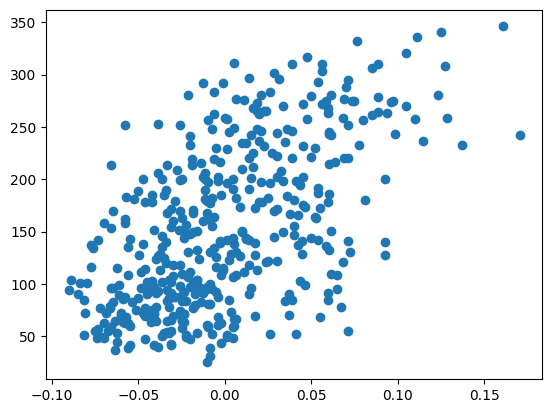

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) # diabetes.data의 열(특성) 중 3번째(2)와 타깃 데이터로 산점도 그리기
# 그래프의 x축은 diabetes의 세 번째 특성, y축은 diabetes.target
plt.show()

위 그래프를 보면, 세 번째 특성(입력 데이터)과 타깃 데이터 사이에 정비례 관계가 있음을 확인할 수 있다.

<h3>2. 훈련 데이터 준비하기</h3>

In [ ]:
x = diabetes.data[:, 2]
y = diabetes.target